<h1>Testiranje</h1>

In [24]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%matplotlib inline



<h1>Analiza filmova</h1>
<p>Projekat iz Statističkih osnova inteligentne obrade podataka</p>
<p>Veljko Vračarević RN140</p>
<h2>Opis: </h2>

<h2>Sadržaj: </h2>
<ol>
    <li>Prikupljanje podataka</li>
    <li>Sređivanje podataka</li>
    <li>Analiza filmova po žanrovima</li>
    <li>Analiza filmova po godinama</li>
</ol>

<p>Skup podataka se sastoji od filmova i ponekih serija (pretežno filmovi) koje sam ranije gledao.
    Posmatraju se sledeća obeležja: 
    <ul>
        <li>Budžet</li>
        <li>Trajanje</li>
        <li>Žanr</li>
        <li>Ocena</li>
        <li>Godina</li>
    </ul>
</p>

<p>Kratak opis posmatranih obeležja: 
    <ul>
        <li><b>Budžet:</b> Budžet za snimanje filma. Mnogi budžeti koje sam nalazio su dati u vidu neke procene od-do, u tom slučaju sam uzimao aritmetičku sredinu.</li>
        <li><b>Trajanje:</b> Dužina filma izražena u minutima.</li>
        <li><b>Žanr:</b> Žanrovi su prikupljeni u vidu liste oblika ['žanr1', 'žanr2', ...], neki imaju više neki manje žanrova kojima pripadaju.</li>
        <li><b>Ocena:</b> Od 0 do 5 na osnovu ličnog utiska, ocene mogu biti i oblika 0,5, 1,5 itd.</li>
        <li><b>Godina:</b> Godina koje je film izašao u bioskope.</li>
    </ul>
</p>

<h2>Prikupljanje podataka</h2>

<p>Za prikupljanje podataka sam koristio svoju već postojeću listu odgledanih filmova i serija na sajtu Letterboxd. (link do sajta) 
   </br></br>Eksportovane tabele sa podacima nisu posedovale sva obeležja potrebna za ovu analizu pa su žanrovi i dužine filmova naknadno unesene pomoću python web scrapera a budžeti ručno traženi za svaki element skupa.
   </br></br>Za web scraper su korišćeni linkovi do svakog filma koji su eksportovani sa sajta. Delovi koda kao i njihov kratak opis nalaze se u nastavku:
</p>

```python
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

data_frame = pd.read_csv(r'C:\Users\cho\Desktop\StatistikaProj\data\filmovi.csv')

links = np.asarray(data_frame["Letterboxd URI"])
length_rows = []
count = 0

for link in links:
    page_to_scrape = requests.get(link)

    soup = BeautifulSoup(page_to_scrape.text, "html.parser")
    p_tag = soup.find('p', class_='text-link text-footer')
    if p_tag:
        text = p_tag.get_text(strip=True)
        
        # filter for numeric characters
        minutes = ''.join(filter(str.isdigit, text.split('mins')[0].strip()))
        
        length_rows.append(minutes)

    count = count + 1
    print("Count: ", count)

df = pd.DataFrame(length_rows)

output_file = 'lengths.csv'
df.to_csv(output_file, index=False, header=False)

print(f"Lengths saved to {output_file}")
```

<h2>Sređivanje podataka</h2>

Obzirom na to da nisam uspeo da nađem budžete svih odgledanih filmova, filmovi bez budžeta (Budžet = 0) neće ući u analizu.

In [2]:
data_frame = pd.read_csv('data/filmovi.csv')
data_frame

,Title,Budget,Year,Genre,Rating,LetterboxdRating,Letterboxd URI,Length,Actors
0,13 Sins,4000000,2014,Thriller|Horror,3.5,2.92,https://boxd.it/4Ste,93,Mark Webber|Devon Graye|Tom Bower
1,A Monster Calls,43000000,2016,Animation|Fantasy|Adventure|Family|Drama,5.0,3.70,https://boxd.it/7DjE,108,Lewis MacDougall|Sigourney Weaver|Felicity Jones
2,A Nightmare on Elm Street,1800000,1984,Horror,3.5,3.72,https://boxd.it/2aw0,91,Heather Langenkamp|Robert Englund|Johnny Depp
3,A Serbian Film,0,2010,Horror|Thriller|Crime,1.5,1.80,https://boxd.it/2wBc,104,Sr?an '�ika' Todorovi?|Sergej Trifunovi?|Jelen...
4,Aladdin,28000000,1992,Adventure|Romance|Family|Fantasy|Animation,4.0,3.89,https://boxd.it/29yE,95,Scott Weinger|Robin Williams|Linda Larkin
...,...,...,...,...,...,...,...,...,...
342,X-Men Origins: Wolverine,175000000,2009,ScienceFiction|Adventure|Action,4.0,2.46,https://boxd.it/27ug,107,Hugh Jackman|Liev Schreiber|Danny Huston
343,Yes Man,70000000,2008,Comedy|Romance,3.5,3.12,https://boxd.it/1WPW,104,Jim Carrey|Zooey Deschanel|Bradley Cooper
344,Yu-Gi-Oh!,0,1998,Family|Animation|Comedy,5.0,3.80,https://boxd.it/u3RQ,648,Megumi Ogata|Toshiyuki Morikawa|Yumi Kakazu
345,Zombieland,23600000,2009,Comedy|Horror,3.5,3.53,https://boxd.it/1En6,88,Jesse Eisenberg|Woody Harrelson|Emma Stone


In [3]:
data_frame = data_frame[data_frame.Budget != 0]
data_frame

,Title,Budget,Year,Genre,Rating,LetterboxdRating,Letterboxd URI,Length,Actors
0,13 Sins,4000000,2014,Thriller|Horror,3.5,2.92,https://boxd.it/4Ste,93,Mark Webber|Devon Graye|Tom Bower
1,A Monster Calls,43000000,2016,Animation|Fantasy|Adventure|Family|Drama,5.0,3.70,https://boxd.it/7DjE,108,Lewis MacDougall|Sigourney Weaver|Felicity Jones
2,A Nightmare on Elm Street,1800000,1984,Horror,3.5,3.72,https://boxd.it/2aw0,91,Heather Langenkamp|Robert Englund|Johnny Depp
4,Aladdin,28000000,1992,Adventure|Romance|Family|Fantasy|Animation,4.0,3.89,https://boxd.it/29yE,95,Scott Weinger|Robin Williams|Linda Larkin
5,Alien,10700000,1979,Horror|ScienceFiction,4.5,4.26,https://boxd.it/2awY,117,Tom Skerritt|Sigourney Weaver|Veronica Cartwright
...,...,...,...,...,...,...,...,...,...
341,Wrong Turn 3: Left for Dead,2000000,2009,Thriller|Horror,2.0,2.08,https://boxd.it/1yJ6,91,Tom Frederic|Janet Montgomery|Louise Cliffe
342,X-Men Origins: Wolverine,175000000,2009,ScienceFiction|Adventure|Action,4.0,2.46,https://boxd.it/27ug,107,Hugh Jackman|Liev Schreiber|Danny Huston
343,Yes Man,70000000,2008,Comedy|Romance,3.5,3.12,https://boxd.it/1WPW,104,Jim Carrey|Zooey Deschanel|Bradley Cooper
345,Zombieland,23600000,2009,Comedy|Horror,3.5,3.53,https://boxd.it/1En6,88,Jesse Eisenberg|Woody Harrelson|Emma Stone


In [4]:
data_frame.describe()

,Budget,Year,Rating,LetterboxdRating,Length
count,2.730000e+02,273.000000,262.000000,273.000000,273.000000
mean,7.483736e+07,2007.520147,3.763359,3.330733,115.029304
std,8.801633e+07,10.604199,0.848321,0.671288,35.927918
min,7.000000e+03,1937.000000,0.000000,1.240000,48.000000
25%,1.070000e+07,2003.000000,3.000000,2.910000,93.000000
50%,4.000000e+07,2009.000000,4.000000,3.410000,108.000000
75%,1.150000e+08,2014.000000,4.500000,3.790000,128.000000
max,4.600000e+08,2024.000000,5.000000,4.620000,495.000000


<h2>Analiza filmova</h2>

Za početak bih izdvojio neke svoje pretpostavke i preference radi kasnijeg poređenja sa dobijenim podacima:

Omiljeni žanr: Naučna fantastika</br>
Omiljeni glumac: Džek Blek</br>
Omiljena glumica: Nemam</br>
Da li smatram da je budžet filma presudan: Ne</br>
Da li smatram da sam blag kada su ocene filmova u pitanju: Da (često dajem najvišu ocenu)</br>


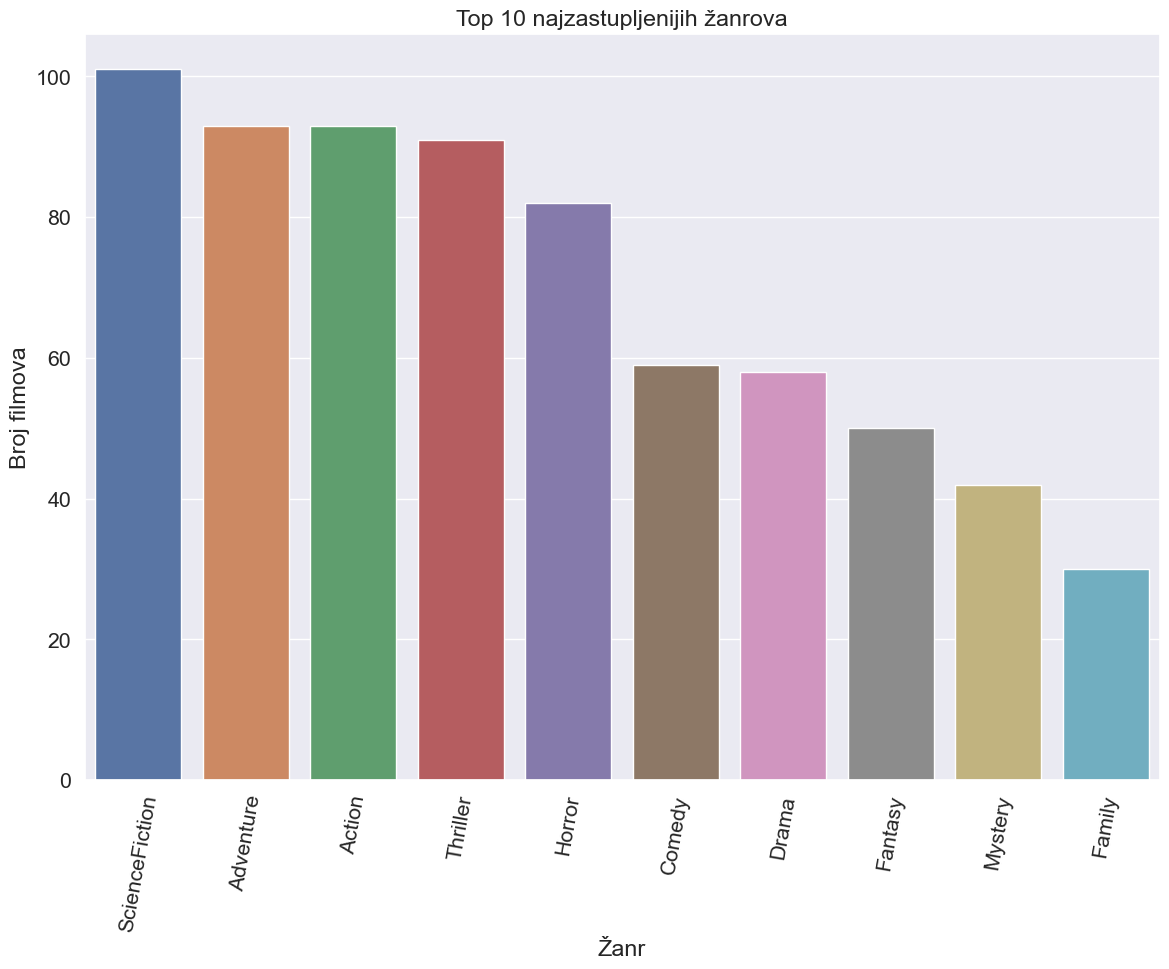

In [27]:
genre_dict = {}

genres = data_frame["Genre"]
genres = genres.str.split("|")
genres = np.array(genres)
for genreList in genres:
    for genre in genreList:
        genre = genre.lstrip()
        if genre not in genre_dict:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1
                

sorted_genre_dict = sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True)

x_axis = []
y_axis = []
for item in sorted_genre_dict[:10]:
    x_axis.append(item[0])
    y_axis.append(item[1])

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x=x_axis, y=y_axis, hue=x_axis, legend=False)

for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(xlabel='Žanr', ylabel='Broj filmova', title='Top 10 najzastupljenijih žanrova')
plt.tight_layout()
plt.show()

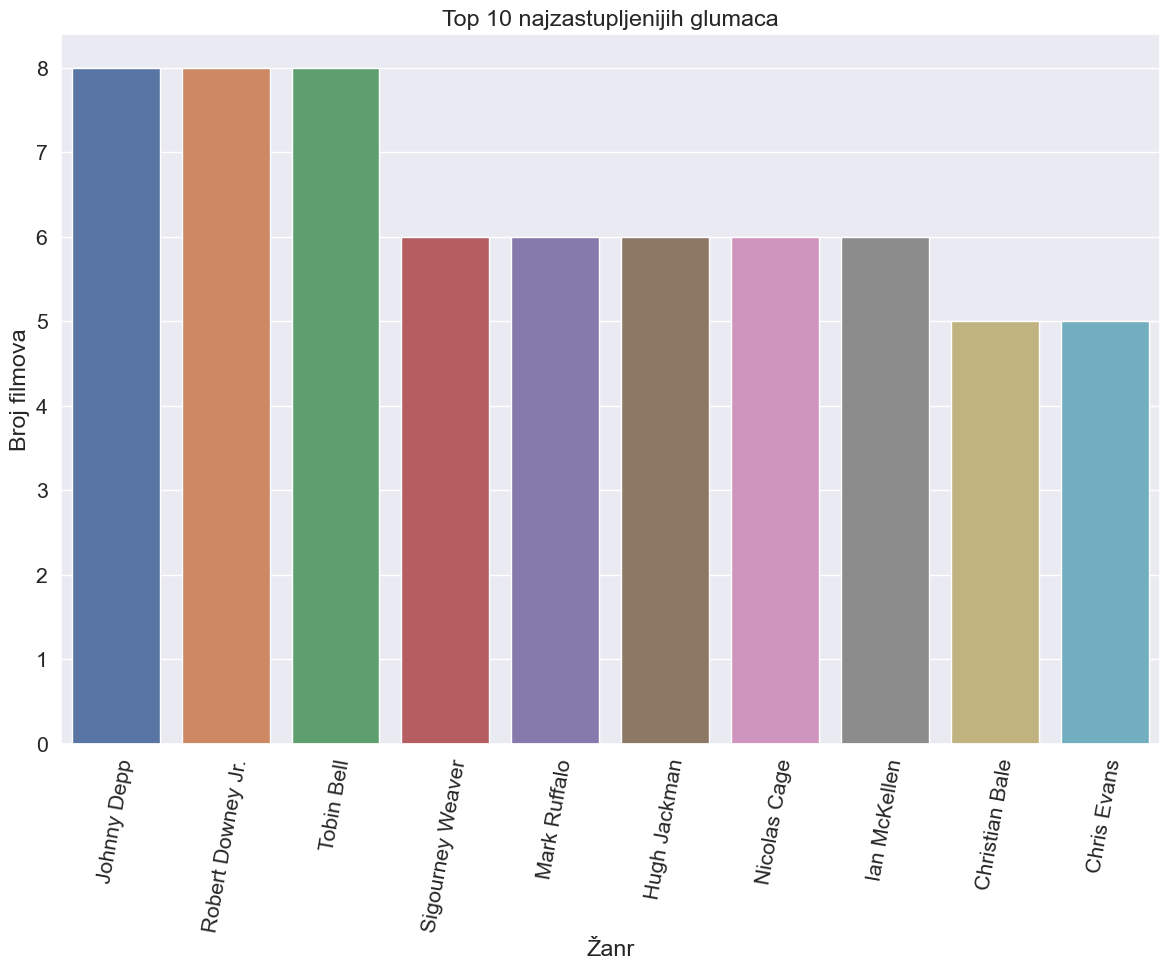

In [28]:
actor_dict = {}

actors = data_frame["Actors"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    for actor in actorList:
        actor = actor.lstrip()
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                

sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)

x_axis = []
y_axis = []
for item in sorted_actor_dict[:10]:
    x_axis.append(item[0])
    y_axis.append(item[1])

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x=x_axis, y=y_axis, hue=x_axis, legend=False)

for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(xlabel='Žanr', ylabel='Broj filmova', title='Top 10 najzastupljenijih glumaca')
plt.tight_layout()
plt.show()

In [6]:
year_set = set()
genre_set = set()
genres_and_year = data_frame[["Genre", "Year"]]

#########################
#create a set of unique years of movies
#########################
production_year = genres_and_year["Year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)
        
#print(year_set)


#############################################################
#create a set of unique genres by parsing all the years
#############################################################
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.Year == year]
    genres_in_year = genres_in_year["Genre"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.add(genre)


#print("year:", year, "\n", sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True))      


##########################################################################
#create a dataframe which contains the sum of movies' genre per year
##########################################################################
gerne_count_per_year_df = pd.DataFrame(index = sorted(year_set), columns=sorted(genre_set))
gerne_count_per_year_df[:] = 0  

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.Year == year]
    genres_in_year = genres_in_year["Genre"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]



########################################################
###most popular genre of movies from year to year
########################################################
#print(gerne_count_per_year_df.apply( max, axis=1 ))
#print(gerne_count_per_year_df.idxmax(axis = 1))
most_popular_genre_by_year = pd.DataFrame([gerne_count_per_year_df.idxmax(axis = 1).values,
                                          gerne_count_per_year_df.apply( max, axis=1 ).values],
                                          columns = gerne_count_per_year_df.index,
                                         index = ["genre", 'counts'])

In [7]:
most_popular_genre_by_year


,1937,1972,1979,1980,1981,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
genre,Animation,Crime,Horror,Horror,Action,Action,Comedy,Action,Thriller,Fantasy,...,ScienceFiction,Action,ScienceFiction,Action,Drama,ScienceFiction,Adventure,Comedy,Action,ScienceFiction
counts,1,1,1,1,1,2,2,1,2,2,...,8,4,7,4,5,2,3,2,3,5


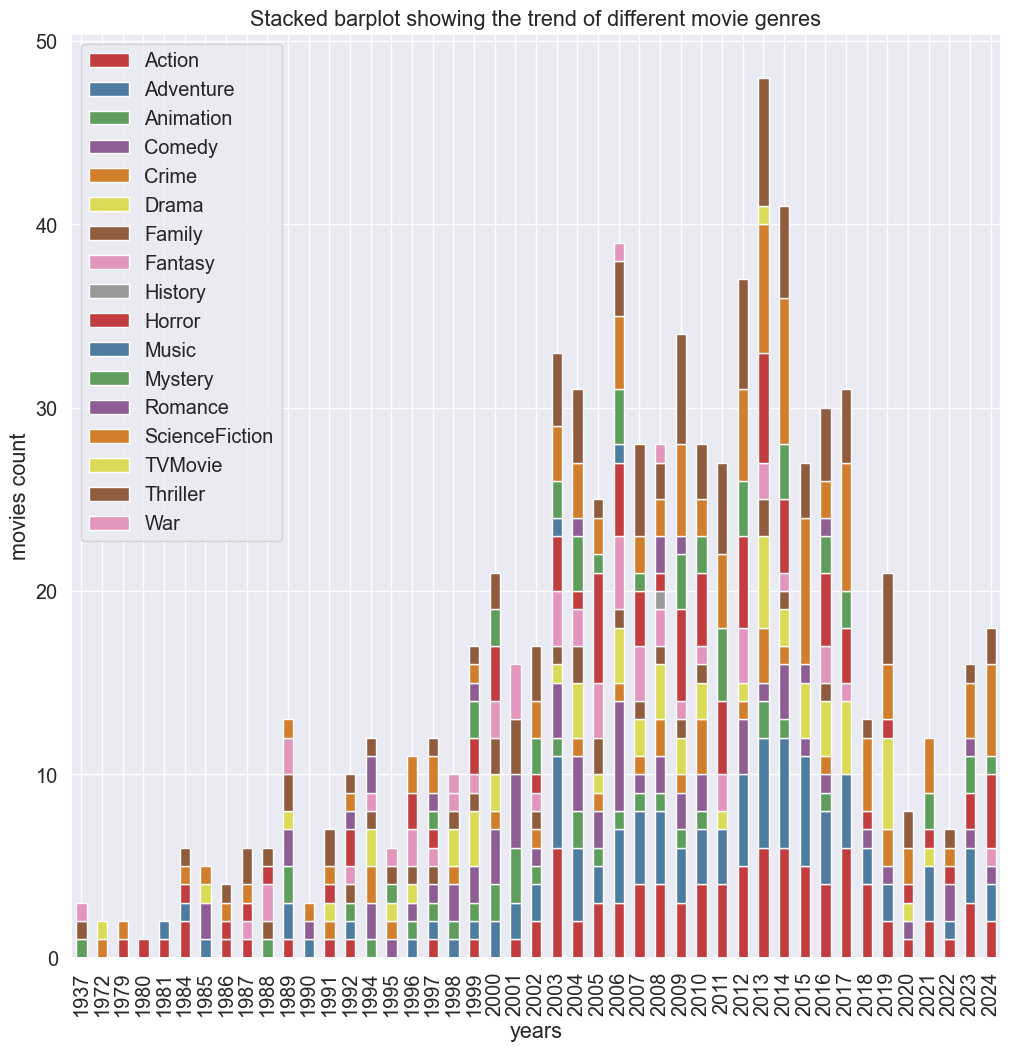

In [8]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)
sns.set_palette("Set1", 20, .65)


ax = gerne_count_per_year_df.plot.bar(stacked=True);
ax.set(xlabel='years', ylabel='movies count', title = 'Stacked barplot showing the trend of different movie genres')
plt.show()


#ax = gerne_count_per_year_df.plot.area(stacked=True);
#ax.set(xlabel='movie titles', ylabel='movies count', title = 'Stacked area plot showing the trend of different movie genres')
#plt.show()

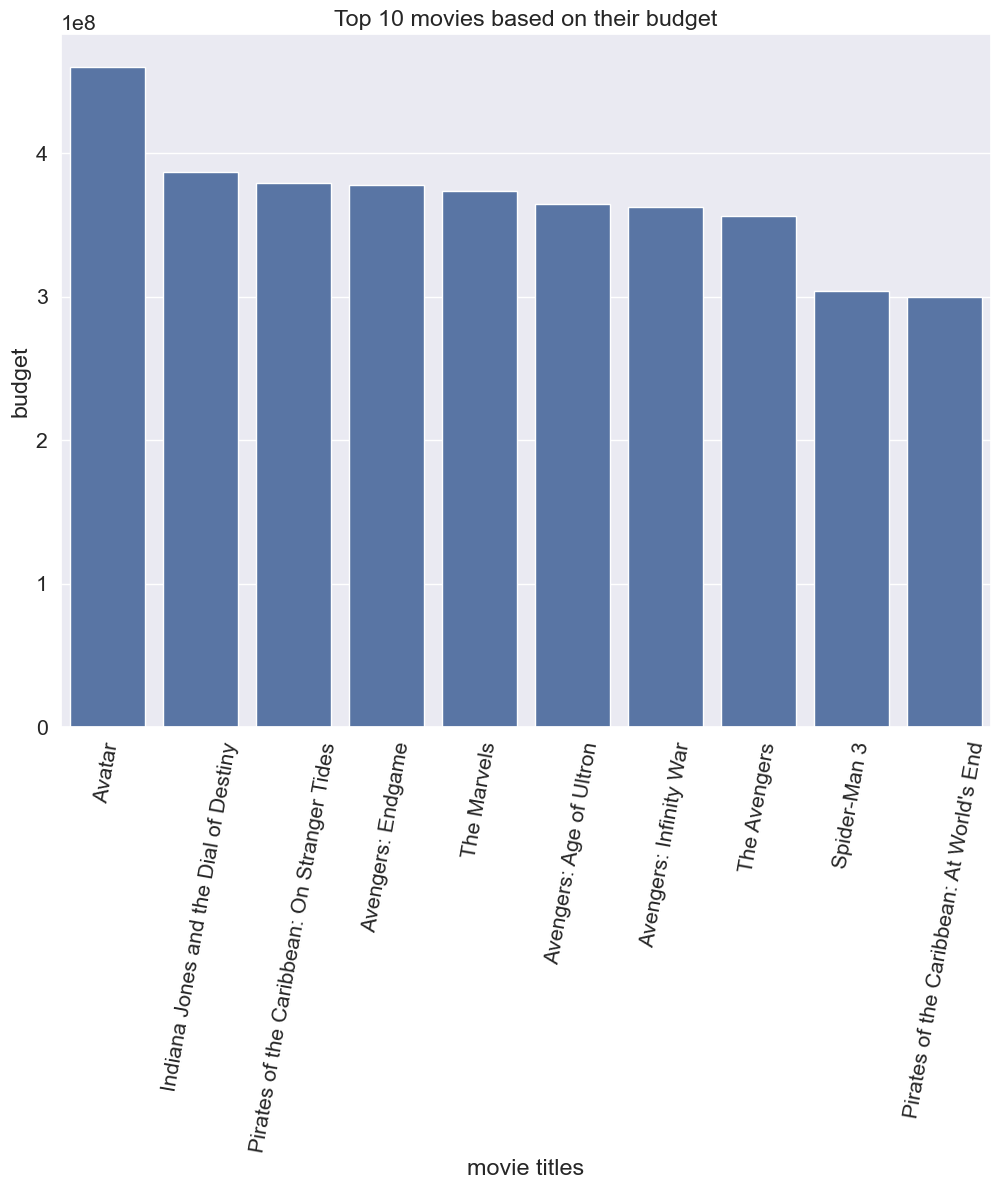

In [29]:
#####
#Top 10 movie with the highest adjusted revenue
#####
movies_and_budget = data_frame[['Title', 'Budget']]

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


top_movies = movies_and_budget.sort_values(by="Budget", ascending = False).head(10)

ax = sns.barplot(x=top_movies["Title"], y=top_movies["Budget"])


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(xlabel='movie titles', ylabel='budget', title = 'Top 10 movies based on their budget')
plt.show()

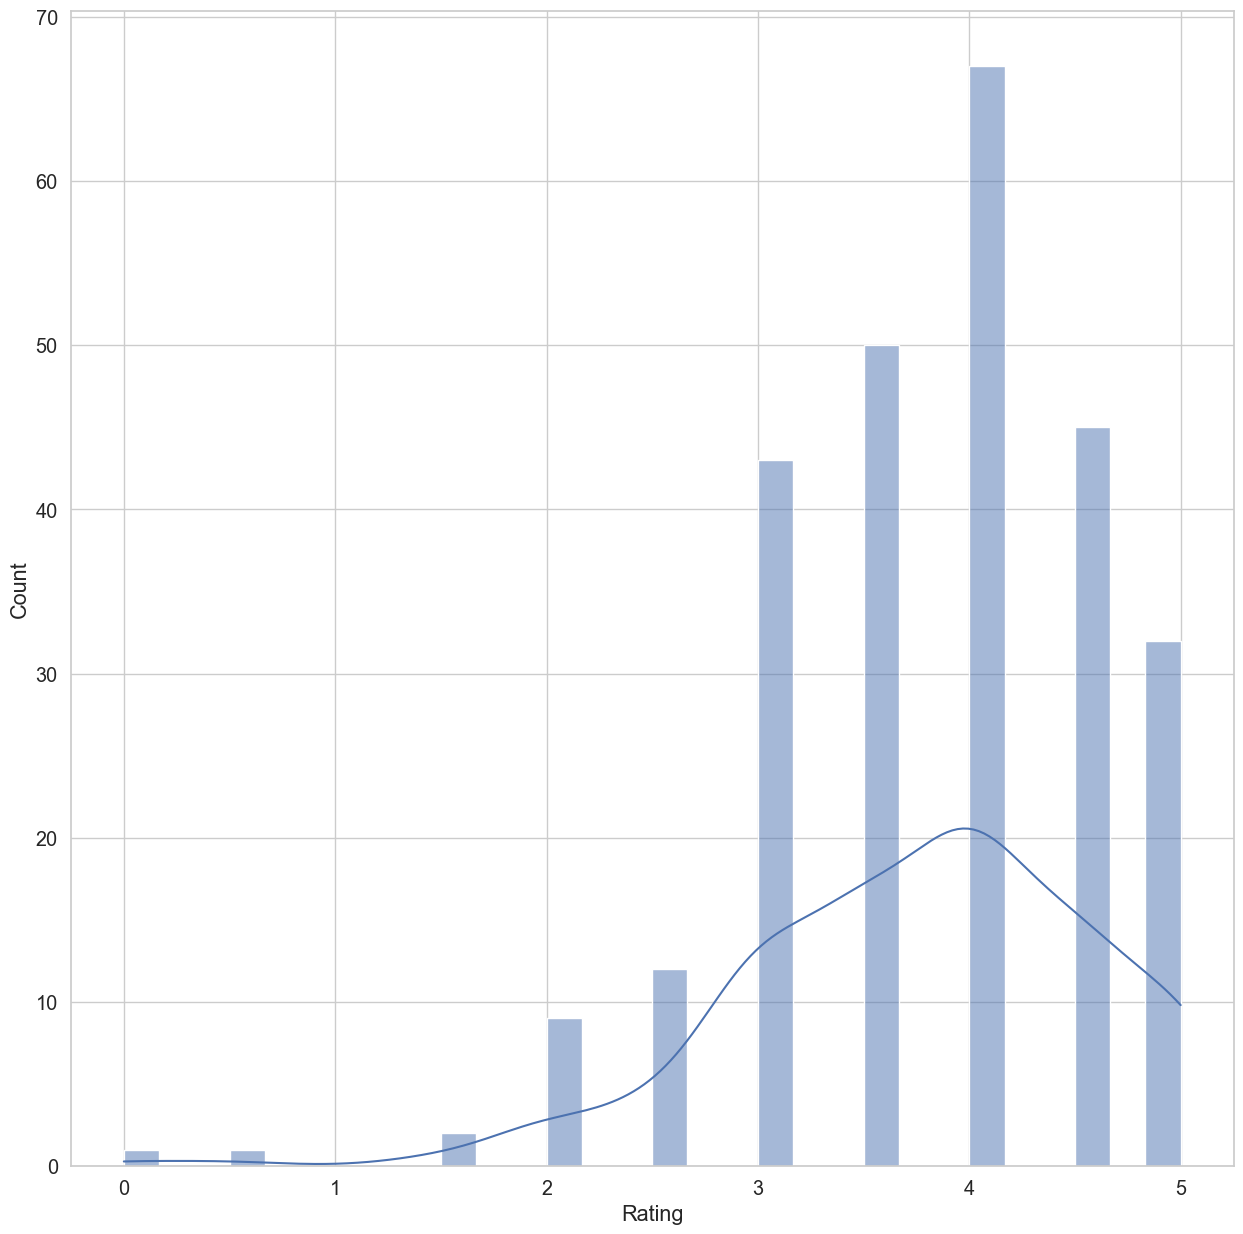

In [32]:
#####
#movie ratings' distribution all over the years
#####

sns.set(rc={'figure.figsize': (15, 15)}, font_scale=1.3)

temp_df = data_frame[["Rating"]]

sns.set_style("whitegrid")

# Use histplot instead of distplot
ax = sns.histplot(temp_df["Rating"], bins=30, kde=True)

plt.show()

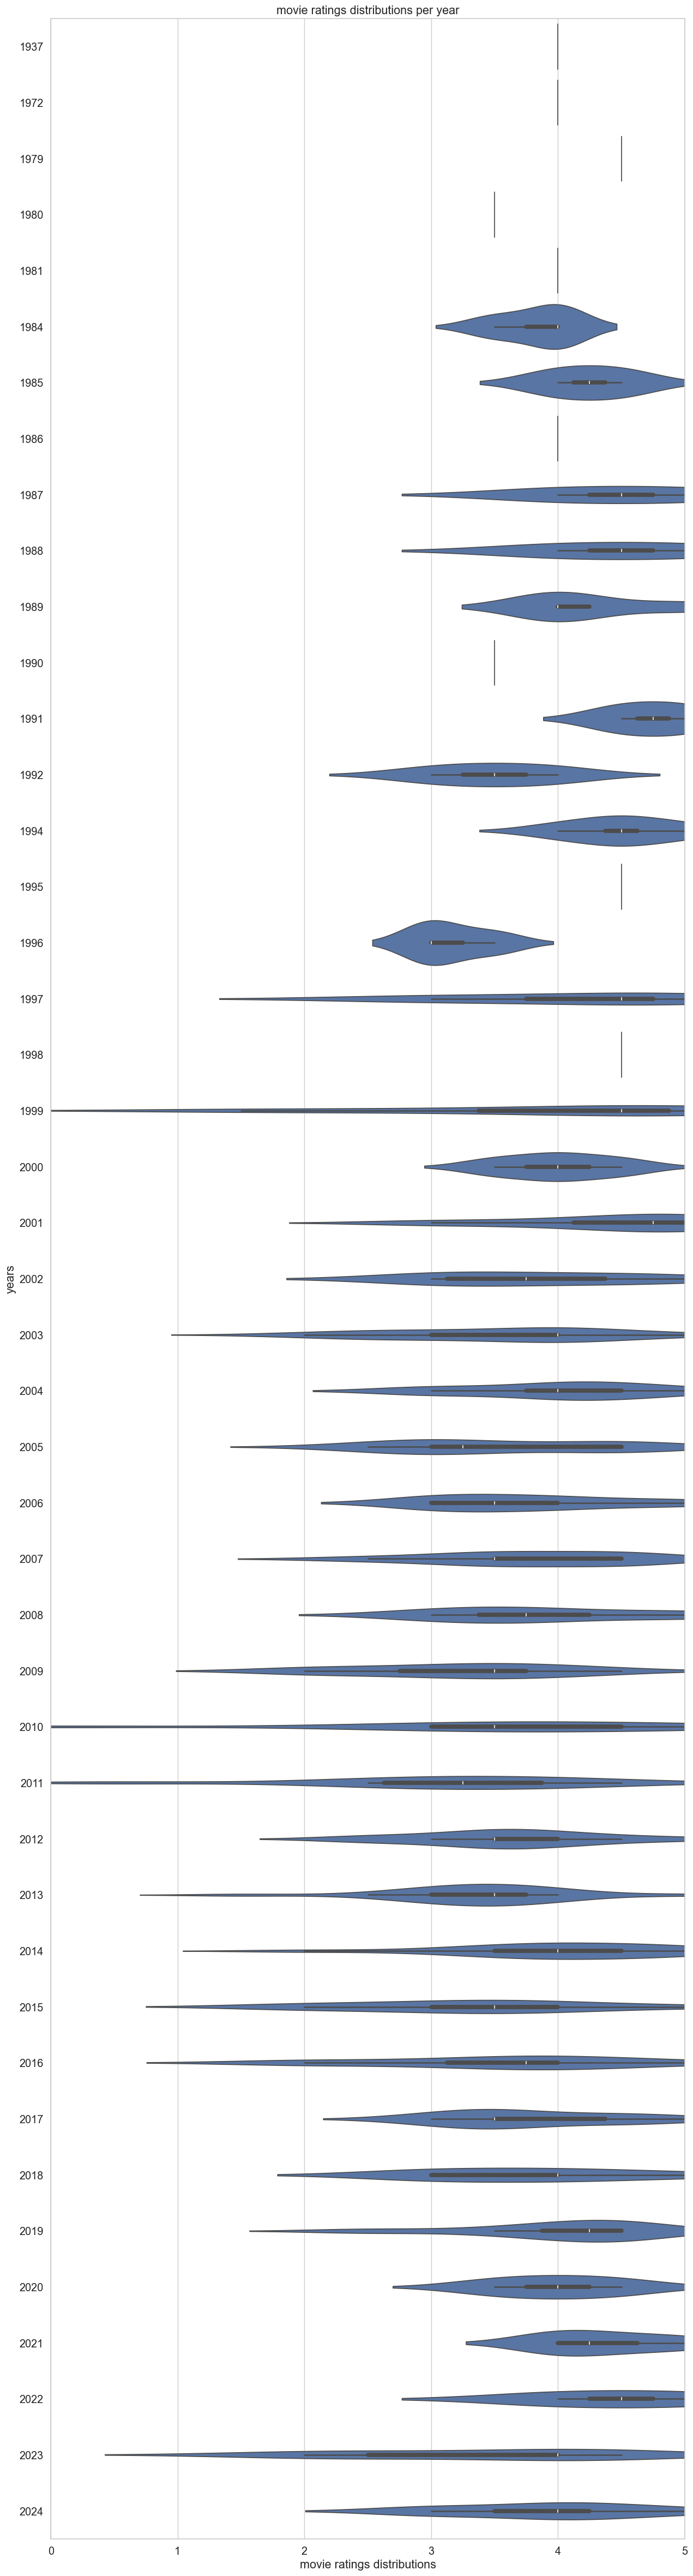

In [39]:
#####
#movie ratings' distributions per year
#####

sns.set(rc={'figure.figsize':(15,60)}, font_scale=1.3)

temp_df = data_frame[["Year", "Rating"]].dropna()


sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.Rating, y = temp_df.Year, orient ="h")

ax.set(xlabel='movie ratings distributions', ylabel='years', title = 'movie ratings distributions per year')
plt.xlim(0, 5)
plt.show()

<h2>Korelacije</h2>

Text(0.5, 0.98, 'scatterplt and correlation for Rating and LetterboxdRating')

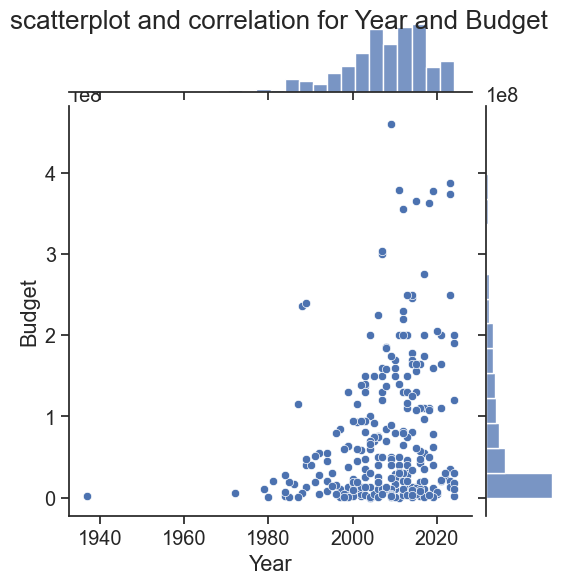

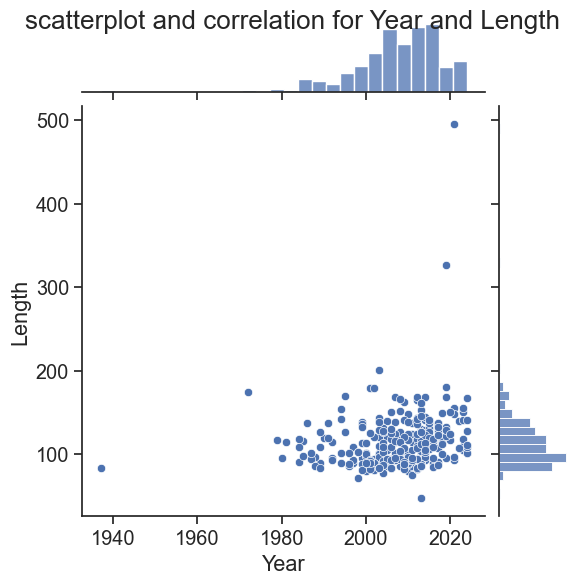

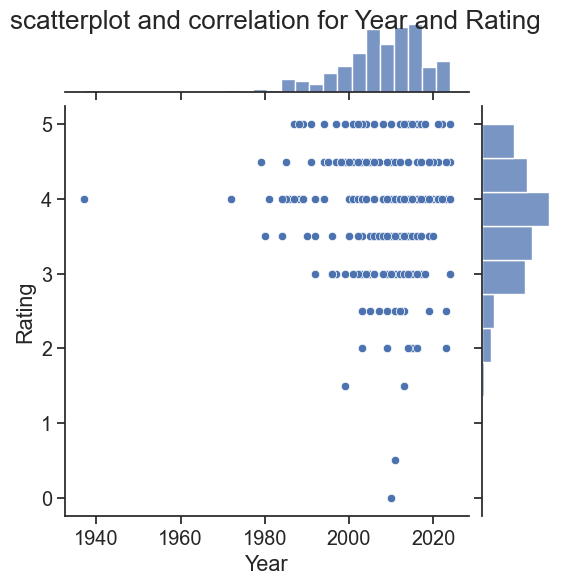

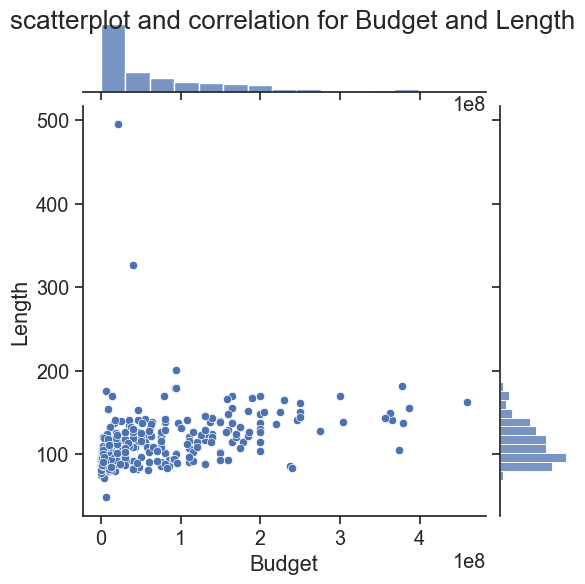

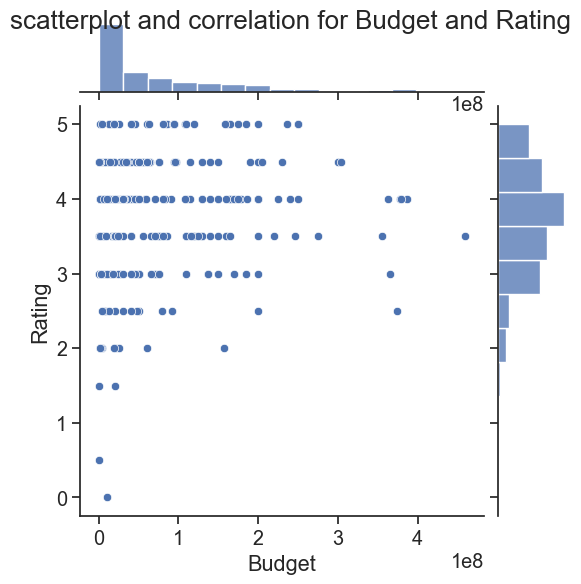

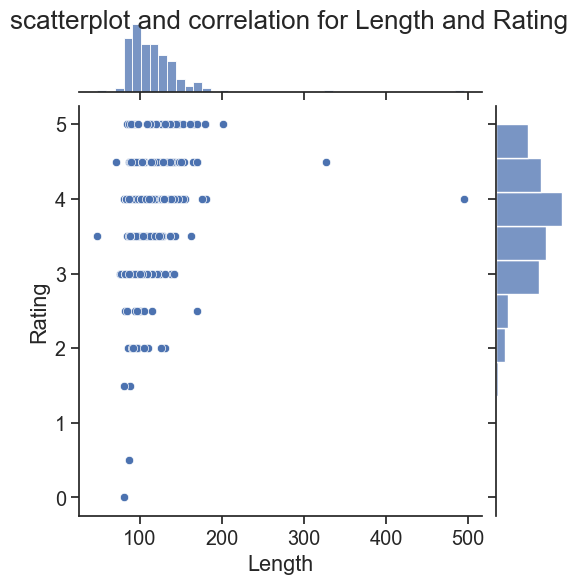

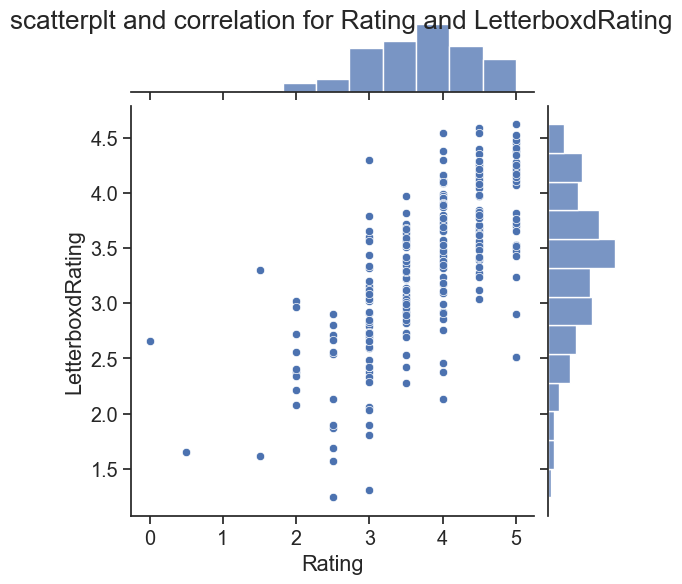

In [13]:
#####
#correlation plots
#####

#get
aux_df = data_frame[['Budget', 'Year', 'Length', 'Rating', 'LetterboxdRating']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")


f1 = sns.jointplot(x = "Year", y = "Budget", kind = "scatter", data = aux_df)
f1.fig.suptitle('scatterplot and correlation for Year and Budget')

f2 = sns.jointplot(x = "Year", y = "Length", kind = "scatter", data = aux_df)
f2.fig.suptitle('scatterplot and correlation for Year and Length')
f3 = sns.jointplot(x = "Year", y = "Rating", kind = "scatter", data = aux_df)
f3.fig.suptitle('scatterplot and correlation for Year and Rating')

f4 = sns.jointplot(x = "Budget", y = "Length", kind = "scatter", data = aux_df)
f4.fig.suptitle('scatterplot and correlation for Budget and Length')
f5 = sns.jointplot(x = "Budget", y = "Rating", kind = "scatter", data = aux_df)
f5.fig.suptitle('scatterplot and correlation for Budget and Rating')

f6 = sns.jointplot(x = "Length", y = "Rating", kind = "scatter", data = aux_df)
f6.fig.suptitle('scatterplot and correlation for Length and Rating')

f7 = sns.jointplot(x = "Rating", y = "LetterboxdRating", kind = "scatter", data = aux_df)
f7.fig.suptitle("scatterplt and correlation for Rating and LetterboxdRating")

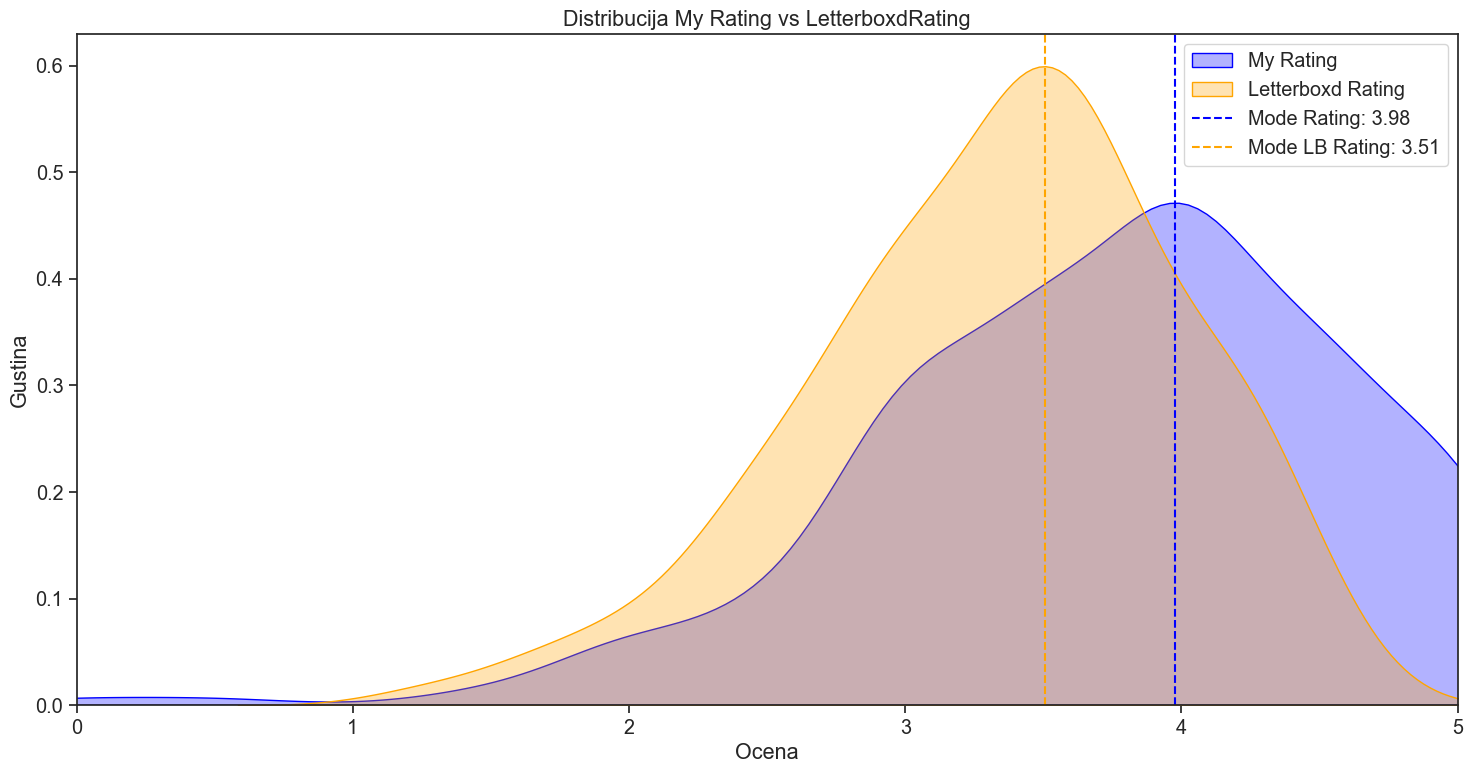

In [26]:
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3, style="ticks")

aux_df = data_frame[['Rating', 'LetterboxdRating']]

my_ratings = aux_df['Rating'].dropna()
lb_ratings = aux_df['LetterboxdRating'].dropna()

# KDE za My Rating
kde_my = gaussian_kde(my_ratings)
x_my = np.linspace(0, 5, 500)
y_my = kde_my(x_my)
mode_my = x_my[np.argmax(y_my)]

# KDE za Letterboxd Rating
kde_lb = gaussian_kde(lb_ratings)
x_lb = np.linspace(0, 5, 500)
y_lb = kde_lb(x_lb)
mode_lb = x_lb[np.argmax(y_lb)]

# Crtanje distribucija
sns.kdeplot(my_ratings, fill=True, color="blue", label="My Rating", alpha=0.3)
sns.kdeplot(lb_ratings, fill=True, color="orange", label="Letterboxd Rating", alpha=0.3)

# Obeležavanje modalne vrednosti
plt.axvline(mode_my, color="blue", linestyle="--", linewidth=1.5, label=f"Mode Rating: {mode_my:.2f}")
plt.axvline(mode_lb, color="orange", linestyle="--", linewidth=1.5, label=f"Mode LB Rating: {mode_lb:.2f}")

plt.title("Distribucija My Rating vs LetterboxdRating")
plt.xlabel("Ocena")
plt.ylabel("Gustina")
plt.xlim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

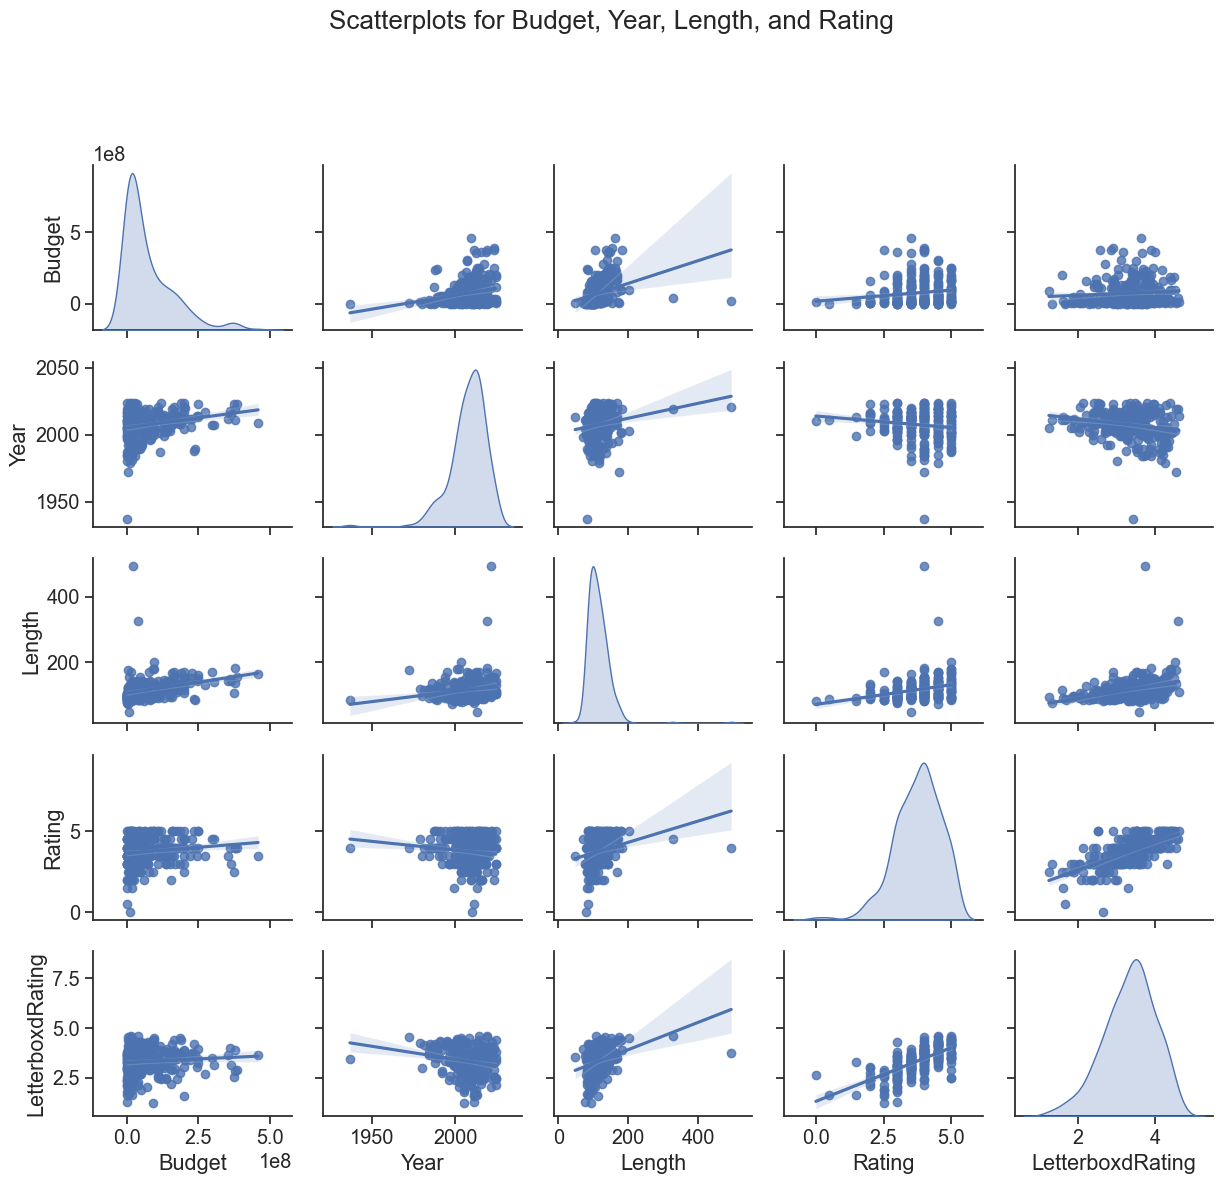

In [14]:
f1 = sns.pairplot(aux_df, kind="reg", diag_kind="kde", diag_kws=dict(fill=True))  # Use fill=True instead of shade=True
f1.fig.suptitle('Scatterplots for Budget, Year, Length, and Rating\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])